In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 100
gen = np.random.default_rng(42)
A = gen.standard_normal((n, n), dtype=np.float64)
A = A.T @ A + 1e-2 * np.eye(n)
b = gen.standard_normal((n, ), dtype=np.float64)

In [ ]:
def func(x):
  return 0.5 * x @ A @ x - b @ x

def grad_f(x):
  return A @ x - b

In [ ]:
x0 = gen.standard_normal((n, ), dtype=np.float64)
num_iter = 50000
tol = 1e-6
# alpha = 1e-4

In [ ]:
print(np.linalg.cond(A))
L = np.max(np.linalg.eigvalsh(A))
print(L)
alpha = 1./L

35238.35409045035
353.1867392980661


In [ ]:
def gd(grad, x0, num_iter, tol, alpha):
  x = x0.copy()
  conv = [x.copy()]
  for iter_idx in range(num_iter):
    g = grad(x)
    if np.linalg.norm(g) < tol:
      break
    x = x - alpha * g
    conv.append(x.copy())
  return x, conv

In [ ]:
from ast import Continue
beta = 0.9
def heavy_ball(grad, x0, num_iter, tol, alpha, beta):
  x = x0.copy()
  conv = [x.copy()]
  for iter_idx in range(num_iter):
    g = grad(x)
    if np.linalg.norm(g) < tol:
      break
    if len(conv) > 1:
      x = x - alpha * g + beta * (x - conv[-2])
    else:
      x = x - alpha * g
    conv.append(x.copy())
  return x, conv

def accelerated_gradient(grad, x0, num_iter, tol, alpha, restart=False):
  x = x0.copy()
  y = x0.copy()
  conv = [x.copy()]
  k = 0
  for iter_idx in range(num_iter):
    x_next = y - alpha * grad(y)
    if restart and func(x) < func(x_next):
      x_next = x - alpha * grad(x)
      k = 0
    y = x_next + (k + 1) / (k + 4) * (x_next - x)
    x = x_next.copy()
    g = grad(x)
    if np.linalg.norm(g) < tol:
      break
    conv.append(x.copy())
    k += 1
  return x, conv

def corrected_agm(grad, x0, num_iter, tol, alpha, mu, nesterov=False):
  x = x0.copy()
  conv = [x.copy()]
  m = np.zeros_like(x0)
  for iter_idx in range(num_iter):
    current_grad = grad(x)
    if np.linalg.norm(current_grad) < tol:
      break
    m = current_grad + mu * m
    if nesterov:
      g = -alpha * (mu * m + current_grad)
    else:
      g = -alpha * m
    x = x + g
    conv.append(x.copy())
  return x, conv


In [ ]:
# x_gd, conv_gd = gd(grad_f, x0, num_iter, tol, alpha)
x_hb, conv_hb = heavy_ball(grad_f, x0, num_iter, tol, 1e-4, 0.99)
x_ag, conv_ag = accelerated_gradient(grad_f, x0, num_iter, tol, alpha)
_, conv_ag_restart = accelerated_gradient(grad_f, x0, num_iter, tol, alpha, True)
x_cagm, conv_corr_agm = corrected_agm(grad_f, x0, num_iter, tol, 1e-4, 0.99, True)

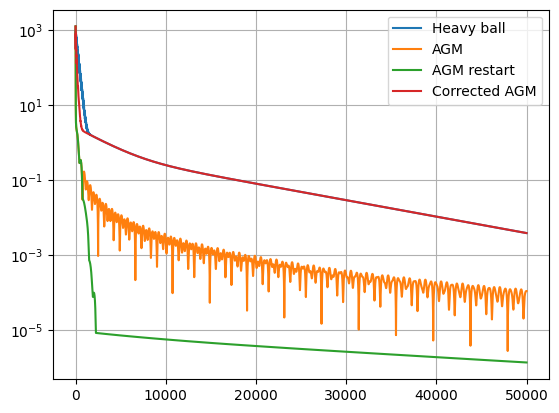

In [ ]:
# plt.semilogy([np.linalg.norm(grad_f(x)) for x in conv_gd], label="GD")
plt.semilogy([np.linalg.norm(grad_f(x)) for x in conv_hb], label="Heavy ball")
plt.semilogy([np.linalg.norm(grad_f(x)) for x in conv_ag], label="AGM")
plt.semilogy([np.linalg.norm(grad_f(x)) for x in conv_ag_restart], label="AGM restart")
plt.semilogy([np.linalg.norm(grad_f(x)) for x in conv_corr_agm], label="Corrected AGM")
plt.legend()
plt.grid(True)

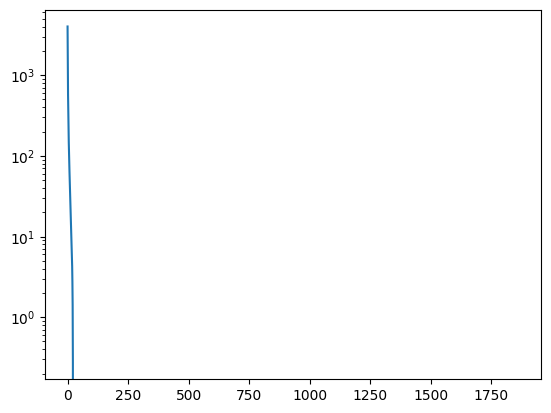

In [ ]:
plt.semilogy([func(x) for x in conv_ag], label="AGM")

In [ ]:
min(np.linalg.eigvalsh(A))

2.2793300490287692e-05